In [1]:
import  pandas as pd 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')
import json 
%matplotlib inline 

In [2]:
train_path ="../v2/train_sample_v2.csv"
test_path ="../v2/test_sample_v2.csv"

train_data =  pd.read_csv( train_path)
test_data = pd.read_csv(  test_path  ) 

In [3]:
train_data.drop('Unnamed: 0' ,axis =1 , inplace= True)

In [4]:
train_data

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.099553e+19,0,14102518,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,1,0,4687,320,50,423,2,39,100148,32
1,1.682200e+19,1,14102516,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,1,0,4687,320,50,423,2,39,100148,32
2,6.429850e+18,1,14102501,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,-1,79
3,1.039696e+19,0,14102810,1005,0,85f751fd,c4e18dd6,50e219e0,f0d41ff1,2347f47a,...,1,0,23143,320,50,2665,0,35,-1,221
4,5.672562e+18,0,14102520,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,22258,320,50,2545,0,167,-1,221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40423,7.729864e+18,0,14102303,1005,1,ec47f32a,7e091613,f028772b,ecad2386,7801e8d9,...,1,0,21921,320,50,2528,0,35,100081,221
40424,1.230941e+19,0,14102809,1005,0,85f751fd,c4e18dd6,50e219e0,f53417e1,0e8616ad,...,1,0,23144,320,50,2665,0,34,-1,221
40425,1.505666e+19,0,14102509,1005,1,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,...,1,0,16208,320,50,1800,3,167,100077,23
40426,4.609230e+18,0,14102719,1005,0,85f751fd,c4e18dd6,50e219e0,92f5800b,ae637522,...,1,3,21191,320,50,2424,1,161,100189,71


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40428 entries, 0 to 40427
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                40428 non-null  float64
 1   click             40428 non-null  int64  
 2   hour              40428 non-null  int64  
 3   C1                40428 non-null  int64  
 4   banner_pos        40428 non-null  int64  
 5   site_id           40428 non-null  object 
 6   site_domain       40428 non-null  object 
 7   site_category     40428 non-null  object 
 8   app_id            40428 non-null  object 
 9   app_domain        40428 non-null  object 
 10  app_category      40428 non-null  object 
 11  device_id         40428 non-null  object 
 12  device_ip         40428 non-null  object 
 13  device_model      40428 non-null  object 
 14  device_type       40428 non-null  int64  
 15  device_conn_type  40428 non-null  int64  
 16  C14               40428 non-null  int64 

In [6]:
train_data.isnull().sum()

id                  0
click               0
hour                0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
dtype: int64

In [7]:
train_data.dtypes

id                  float64
click                 int64
hour                  int64
C1                    int64
banner_pos            int64
site_id              object
site_domain          object
site_category        object
app_id               object
app_domain           object
app_category         object
device_id            object
device_ip            object
device_model         object
device_type           int64
device_conn_type      int64
C14                   int64
C15                   int64
C16                   int64
C17                   int64
C18                   int64
C19                   int64
C20                   int64
C21                   int64
dtype: object

In [8]:
cols = train_data.select_dtypes('object').columns
cols

Index(['site_id', 'site_domain', 'site_category', 'app_id', 'app_domain',
       'app_category', 'device_id', 'device_ip', 'device_model'],
      dtype='object')

In [9]:
# plt.figure(figsize =(40 , 8 ))
# i= 0 
# for col in cols:
#     plt.subplot( 5,2,(i+1) %2)
#     train_data[col].value_counts().plot.bar()
#     plt.show()

In [10]:
l = {}
for  col in cols :
    print( col ) 
    i = 0 
    t_s = train_data[col].value_counts()
    t_p = t_s.cumsum()/sum( t_s)
    for  p in t_p :
        if p> 0.8:
            break 
        i+=1
    print( i )
    print ()

site_id
25

site_domain
18

site_category
2

app_id
9

app_domain
1

app_category
1

device_id
0

device_ip
25890

device_model
288



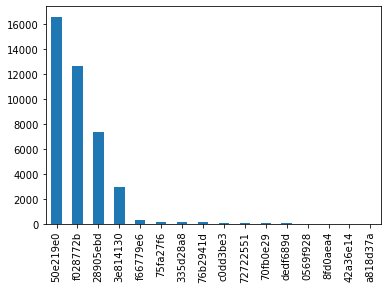

In [11]:
train_data['site_category'].value_counts().plot.bar()

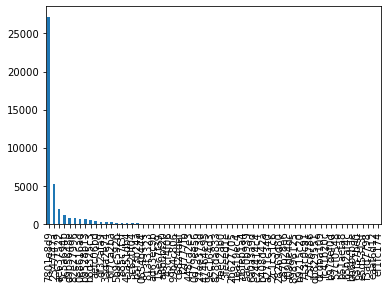

In [12]:
#app_domain
train_data['app_domain'].value_counts().plot.bar()

In [13]:
# len(train_data['app_domain'].value_counts()) # 64 
train_data['app_domain'].value_counts()[-55 :] # <200 

aefc06bd    305
df32afa9    293
33da2e74    259
6f7ca2ba    240
5b9c592b    106
885c7f3f     88
45a51db4     63
5c620f04     59
b5f3b24a     53
0654b444     32
813f3323     25
ad63ec9b     15
15ec7f39     12
a8b0bf20     12
43cf4f06     11
99b4c806     11
c6824def     11
f2f777fb     10
448ca2e3      6
0d79ee56      6
27ee373d      4
47464e95      4
9ec164d3      4
828da833      4
7eec2ab0      3
3feeed1e      3
2b627705      3
1ea19ec4      3
d6feb1a4      3
5ac0b939      2
6a0a3a9d      2
e24414c4      2
b408d42a      2
a271c340      1
2c1c31c6      1
28269d80      1
c87b28e6      1
f09de4dc      1
89896125      1
b9215c20      1
713c0c91      1
73fc6786      1
db829551      1
dcdba109      1
fc41b20c      1
b97def0d      1
57cf0548      1
b51aefa8      1
65b2af4c      1
bb6bcbae      1
63f57be0      1
e5d5313f      1
f3ad7798      1
eaaf6d12      1
ef1fc174      1
Name: app_domain, dtype: int64

In [14]:
#app_id
train_data['app_id'].value_counts() # 二值处理

ecad2386    25771
92f5800b     1594
e2fcccd2     1141
9c13b419      824
febd1138      741
            ...  
83addf7e        1
22c962a1        1
1bd329de        1
07fdc399        1
6956dfe5        1
Name: app_id, Length: 880, dtype: int64

In [15]:
# device_id
train_data['device_id'].value_counts() # 二值处理

a99f214a    33403
0f7c61dc       26
c357dbff       16
936e92fb       12
b09da1c4       11
            ...  
20771fe9        1
2f1eb65d        1
03526d0d        1
6979df0d        1
42f4592b        1
Name: device_id, Length: 6870, dtype: int64

In [16]:
# site_id
train_data['site_id'].value_counts().values.sum()

40428

In [17]:
(train_data['site_id'].value_counts().cumsum()/ 40428 ) [:15] #十个

85f751fd    0.362546
1fbe01fe    0.521718
e151e245    0.586796
d9750ee7    0.610443
5b08c53b    0.632235
856e6d3f    0.651355
5b4d2eda    0.670426
a7853007    0.682324
b7e9786d    0.691550
5ee41ff2    0.700406
5bcf81a2    0.709088
57ef2c87    0.717473
6399eda6    0.725784
6256f5b4    0.733007
0a742914    0.740032
Name: site_id, dtype: float64

In [18]:
train_data['device_ip'].value_counts()[-40000:] # 大量<=1 


6b9769f2    206
431b3174    123
2f323f36    107
930ec31d     93
af62faf4     91
           ... 
76e48bb9      1
5c6c7c0a      1
b96b52be      1
450cebfd      1
dbb42d31      1
Name: device_ip, Length: 33976, dtype: int64

In [19]:
l = train_data['device_model'].value_counts().values
p =sum( [ 1 if x >200 else 0  for x in l  ]) /len(l)
print( 1- p ) # 

0.9846153846153847


In [20]:
l = train_data['site_domain'].value_counts().values
p =sum( [ 1 if x >200 else 0  for x in l  ]) /len(l)
print( 1- p ) # 

0.9733924611973392


In [21]:
# site_id , 15 个
# device_id ，app_id， 二值处理
# app_domain < 200 others 
# site_category < 200 others 
# device_ip < 200 others 
# device_model  < 200 others 
# site_domain < 200 ohers 


##### 合并处理转化

In [22]:
test_data.drop('Unnamed: 0' ,axis =1 , inplace= True)

In [23]:
test_data.insert( 0 , 'click' , 0 )

In [24]:
tr_ts = pd.concat([test_data , train_data] , axis =0).reset_index()
len(tr_ts)

45005

In [25]:
len(train_data)

40428

In [26]:
# site_id_count = tr_ts.site_id.value_counts()
# site_id_category={}
# site_id_category[0] = site_id_count.loc[site_id_count>20].index.values
# site_id_category[1] = site_id_count.loc[site_id_count<=20].index.values

In [27]:
# site_id_converted_type_dict = {}
# for key, values in site_id_category.items():
#     for item in values:
#         site_id_converted_type_dict[str(item)] = key
# site_id_converted_type_dict

In [28]:
# import json 
# json.dump(site_id_converted_type_dict ,
#           open('site_id_converted_type_dict.json' , 'w') )

In [29]:
# site_domain_count = tr_ts.site_domain.value_counts()
# site_domain_category={}
# site_domain_category[0] = site_domain_count.loc[site_domain_count>20].index.values
# site_domain_category[1] = site_domain_count.loc[site_domain_count<=20].index.values

# site_domain_C_type_dict = {}
# for key, values in site_domain_category.items():
#     for item in values:
#         site_domain_C_type_dict[str(item)] = key

# json.dump(site_domain_C_type_dict, open("output/site_domain_C_type_dict.json", "w"))


In [30]:
train_data.app_id.value_counts()

ecad2386    25771
92f5800b     1594
e2fcccd2     1141
9c13b419      824
febd1138      741
            ...  
83addf7e        1
22c962a1        1
1bd329de        1
07fdc399        1
6956dfe5        1
Name: app_id, Length: 880, dtype: int64

In [31]:
def convert(x , topk , threshold ) :
    if topk:
        category ={}
        v_counts = x.value_counts().index.tolist()[:topk]
        print (v_counts)
        v_counts.append("others")
        for idx , value  in enumerate(x):
            value_bak = value 
            if value not in v_counts :
                x[idx] = 'others'
                value_bak = 'others'
            index = v_counts.index( value_bak )
            category.setdefault( str(index) ,[])
            category[str(index)].append(value)
        json_path =x.name+ '_converted.csv'
        json.dump( category ,  open( json_path , 'w'))
        print ("处理 "+ x.name +" 成功")
        print( "写入" ,json_path , '成功')
    else :
        import copy 
        category ={}
        i_list= x.value_counts().index.tolist()
        i_list.append("others")
        v_counts = x.value_counts()
        for idx , value  in enumerate(x):
            if   v_counts[value] >=threshold :
                index = i_list.index( value )
                category.setdefault( str(index) ,[])
                category[str(index)].append(value)
            else :
                x[idx] = 'others'
                index = i_list.index( 'others' )
                category.setdefault( str(index) ,[])
                category[str(index)].append(value)
        json_path =x.name+ '_converted.csv'
        json.dump( category ,  open( json_path , 'w'))
        print ("处理 "+ x.name +" 成功")
        print( "写入" ,json_path , '成功')

In [32]:
convert(x = tr_ts.app_id , topk= 1 ,threshold=None )
tr_ts.app_id.value_counts()

['ecad2386']
处理 app_id 成功
写入 app_id_converted.csv 成功


ecad2386    28608
others      16397
Name: app_id, dtype: int64

In [33]:
convert(tr_ts.device_id , topk=1 , threshold= None )
tr_ts.device_id.value_counts()

['a99f214a']
处理 device_id 成功
写入 device_id_converted.csv 成功


a99f214a    37326
others       7679
Name: device_id, dtype: int64

In [34]:
convert(tr_ts.app_domain , topk= None , threshold= 750 )
tr_ts.app_domain.value_counts()

处理 app_domain 成功
写入 app_domain_converted.csv 成功


7801e8d9    30160
2347f47a     6104
others       3694
ae637522     2122
5c5a694b     1261
d9b5648e      841
82e27996      823
Name: app_domain, dtype: int64

In [35]:
convert(tr_ts.app_category , topk= 1 , threshold= None )
tr_ts.app_category.value_counts()

['07d7df22']
处理 app_category 成功
写入 app_category_converted.csv 成功


07d7df22    28956
others      16049
Name: app_category, dtype: int64

In [36]:
# site_id , 15 个
# device_id ，app_id， 二值处理
# app_domain < 200 others 
# site_category < 200 others 
# device_ip < 200 others 
# device_model  < 200 others 
# site_domain < 200 ohers 

In [37]:
convert(tr_ts.site_category ,topk= None ,  threshold= 200 )
tr_ts.site_category.value_counts()

处理 site_category 成功
写入 site_category_converted.csv 成功


50e219e0    18494
f028772b    14482
28905ebd     7791
3e814130     3268
others        697
f66779e6      273
Name: site_category, dtype: int64

In [38]:
convert(tr_ts.device_ip , None , 200 )
tr_ts.device_ip.value_counts()

处理 device_ip 成功
写入 device_ip_converted.csv 成功


others      44784
6b9769f2      221
Name: device_ip, dtype: int64

In [39]:
convert(tr_ts.device_model , topk=None ,threshold= 500 )
tr_ts.device_model.value_counts()

处理 device_model 成功
写入 device_model_converted.csv 成功


others      34055
8a4875bd     2676
1f0bc64f     1626
d787e91b     1617
be6db1d7      831
76dc4769      802
4ea23a13      777
a0f5f879      718
7abbbd5c      697
ecb851b2      675
5096d134      531
Name: device_model, dtype: int64

In [40]:
convert(tr_ts.site_domain , topk=None , threshold=500 )
tr_ts.site_domain.value_counts()

处理 site_domain 成功
写入 site_domain_converted.csv 成功


c4e18dd6    16995
others      12552
f3845767     7653
7e091613     3607
7687a86e     1389
98572c79     1058
16a36ef3      942
58a89a43      809
Name: site_domain, dtype: int64

In [41]:
tr_ts

,index,click,id,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,0,0,5.022973e+18,14103116,1005,0,17d1b03f,f3845767,f028772b,ecad2386,...,1,0,22104,320,50,2545,0,431,100084,221
1,1,0,4.432483e+18,14103100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,...,1,0,22676,320,50,2616,0,35,100083,51
2,2,0,1.564934e+19,14103112,1005,0,17d1b03f,f3845767,f028772b,ecad2386,...,1,2,23137,320,50,2664,0,35,-1,51
3,3,0,3.201403e+18,14103120,1005,1,e151e245,7e091613,f028772b,ecad2386,...,1,0,24094,320,50,2761,2,35,100148,13
4,4,0,9.165628e+16,14103107,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,...,1,0,23141,320,50,2664,0,35,100083,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45000,40423,0,7.729864e+18,14102303,1005,1,ec47f32a,7e091613,f028772b,ecad2386,...,1,0,21921,320,50,2528,0,35,100081,221
45001,40424,0,1.230941e+19,14102809,1005,0,85f751fd,c4e18dd6,50e219e0,others,...,1,0,23144,320,50,2665,0,34,-1,221
45002,40425,0,1.505666e+19,14102509,1005,1,856e6d3f,58a89a43,f028772b,ecad2386,...,1,0,16208,320,50,1800,3,167,100077,23
45003,40426,0,4.609230e+18,14102719,1005,0,85f751fd,c4e18dd6,50e219e0,others,...,1,3,21191,320,50,2424,1,161,100189,71


In [42]:
tr_ts.banner_pos.value_counts()

0    32641
1    12271
7       59
2       14
4       10
3        6
5        4
Name: banner_pos, dtype: int64

In [43]:
convert(tr_ts.banner_pos , topk=2 , threshold=None )
tr_ts.banner_pos.value_counts()

[0, 1]
处理 banner_pos 成功
写入 banner_pos_converted.csv 成功


0         32641
1         12271
others       93
Name: banner_pos, dtype: int64

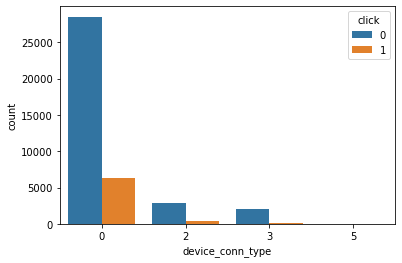

In [44]:
import seaborn as sns 
sns.countplot( x ='device_conn_type' ,hue ="click" , data= train_data )

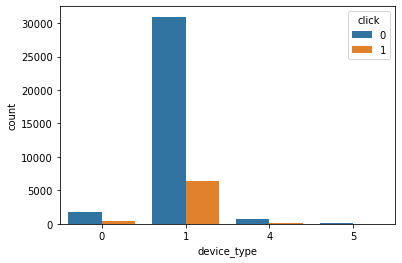

In [45]:
sns.countplot( x ='device_type' ,hue ="click" , data= train_data )

In [46]:
# C14
tr_ts.C14.value_counts().values

array([971, 939, 809, ...,   1,   1,   1], dtype=int64)

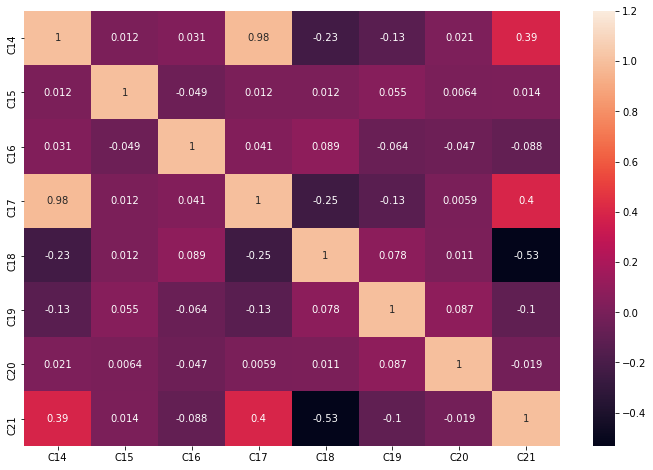

In [47]:
plt.figure( figsize=(12,8))
corr_matrix = tr_ts[ ['C14' ,'C15' ,'C16', 'C17', 'C18' ,'C19' ,'C20' ,'C21' ]].corr()
sns.heatmap( corr_matrix ,annot=True , vmax= 1.2 )

In [48]:
tr_ts['hour'] =tr_ts['hour'].astype("str")
tr_ts['day'] = tr_ts['hour'].apply(lambda x: x[-4:-2])
tr_ts['hour'] = tr_ts['hour'].apply(lambda x: x[-2:])

In [49]:
tr_ts.banner_pos  = tr_ts['banner_pos'].astype("str")
tr_ts.app_category  = tr_ts['device_ip'].astype("str")
tr_ts.app_category  = tr_ts['app_category'].astype("str")

In [50]:
# tr_ts['is_device'] = tr_ts['device_id'].apply(lambda x: 0 if x=='a99f214a' else 1)  

In [51]:
from sklearn import preprocessing
lenc = preprocessing.LabelEncoder()
C_fields = [ 'hour', 'day' ,'device_ip' ,'banner_pos', 'site_category', 'app_domain', 'app_category',
            'device_conn_type', 'C14',"C15" ,'C16' ,'C18', 'C19', 'C20','C21',
            'device_id', 'app_id', 'site_id','site_domain', 'device_model', 'device_type']
for f, column in enumerate(C_fields):
    print("convert " + column + "...")
    tr_ts[column] = lenc.fit_transform(tr_ts[column])

convert hour...
convert day...
convert device_ip...
convert banner_pos...
convert site_category...
convert app_domain...
convert app_category...
convert device_conn_type...
convert C14...
convert C15...
convert C16...
convert C18...
convert C19...
convert C20...
convert C21...
convert device_id...
convert app_id...
convert site_id...
convert site_domain...
convert device_model...
convert device_type...


In [52]:
dummies_site_category = pd.get_dummies(tr_ts['site_category'], prefix = 'site_category')
dummies_app_category = pd.get_dummies(tr_ts['app_category'], prefix = 'app_category')

tr_ts_new = pd.concat([tr_ts, dummies_site_category, dummies_app_category], axis=1)
tr_ts_new.drop(['site_category', 'app_category'], axis = 1, inplace=True)
tr_ts_new.id = tr_ts['id'].astype("int")

tr_ts_new.iloc[:test_data.shape[0],].to_csv('test_features.csv')
tr_ts_new.iloc[test_data.shape[0]:,].to_csv('train_features.csv')

In [53]:
tr_ts_new.dtypes

index               int64
click               int64
id                  int32
hour                int32
C1                  int64
banner_pos          int32
site_id             int32
site_domain         int32
app_id              int32
app_domain          int32
device_id           int32
device_ip           int32
device_model        int32
device_type         int64
device_conn_type    int64
C14                 int64
C15                 int64
C16                 int64
C17                 int64
C18                 int64
C19                 int64
C20                 int64
C21                 int64
day                 int32
site_category_0     uint8
site_category_1     uint8
site_category_2     uint8
site_category_3     uint8
site_category_4     uint8
site_category_5     uint8
app_category_0      uint8
app_category_1      uint8
dtype: object